<a href="https://colab.research.google.com/github/EgorTrushin/HEG/blob/main/Static_tau_sigma_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

**Note that Lindhard function is positive-definite!**

In [ ]:
def static_lindhard_3d(q):
    """ Evaluates static Lindhard function for 3D HEG.

Parameters
----------
q : float
   Momentum.

Returns
-------
x0 : float
   Static Lindhard function for 3D HEG in units of the Fermi momentum k_F.

"""

    prefac = 1.0/(2.0*np.pi**2)
    body = (1.0+(1.0-q**2/4.0)/q*np.log(abs((1.0+q/2.0)/(1.0-q/2.0))))

    return prefac*body

In [ ]:
# Auxiliary function used in static_hx_3d (see below).
term2integrand = lambda x,a,b,k: 1.0/(x-a**2)*np.log(abs(x/a**2))*(0.5*a*b*np.log(abs(x/b**2))-k)


def static_hx_3d(k):
    """ Evaluates static exchange correction/kernel h_x according to Eq. 3
from Qian J. Math. Phys. 56, 111901 (2015).

Parameters
----------
k : float
   Momentum.

Returns
-------
hx : float
   Static exchange correction/kernel.

"""

    a = 1.0-0.5*k
    b = 1.0+0.5*k
    if abs(a) > 0.00001:
        term1 = b*np.log(abs(b/a))**2*(a/3.*np.log(abs(b/a))+b)
    else:
        term1 = 0.0
    if (abs(a) > 0.00001) and (abs(b) > 0.00001):
        term2, err = quad(term2integrand, a**2, b**2, args=(a,b,k))
    else:
        term2 = 0.0

    return (term1+term2)/k**2/(2*np.pi**3)

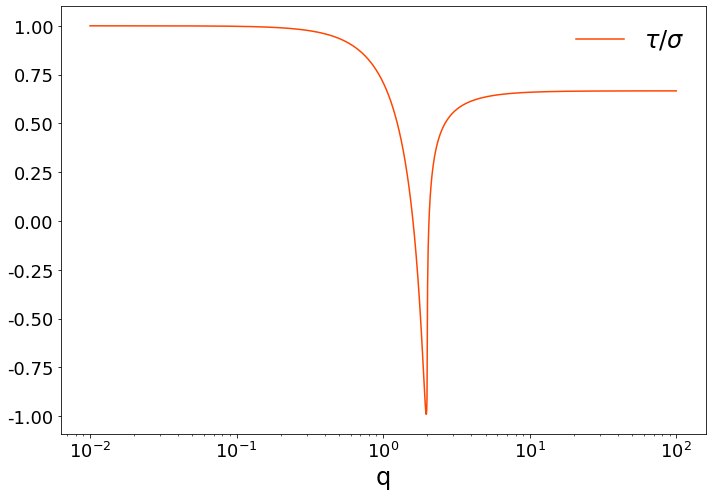

In [ ]:
q = np.logspace(-2,2,2000)

x0 = np.zeros(len(q))
sigma = np.zeros(len(q))
hx = np.zeros(len(q))
tau = np.zeros(len(q))

for i in range(len(q)):
    x0[i] = static_lindhard_3d(q[i])
    sigma[i] = x0[i]*4.0*np.pi/q[i]**2
    hx[i] = static_hx_3d(q[i])
    tau[i] = sigma[i] + hx[i]/x0[i]


plt.figure(figsize=(10,7))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

plt.plot(q,tau/sigma,color='orangered',label=r'$\tau/\sigma$')
plt.xscale('log')
plt.xlabel('q',fontsize=24)

plt.legend(frameon=False,fontsize=24)
plt.tight_layout()
plt.show()

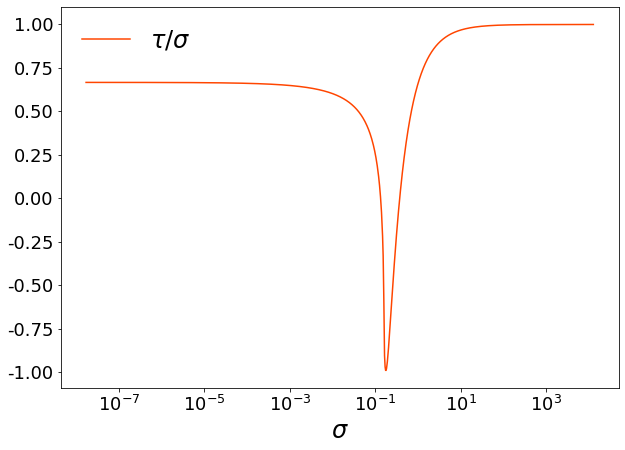

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(sigma,tau/sigma,color='orangered',label=r'$\tau/\sigma$')
plt.xscale('log')
plt.xlabel('$\sigma$',fontsize=24)

plt.legend(frameon=False,fontsize=24)
plt.show()

# In fully-spin polarized case

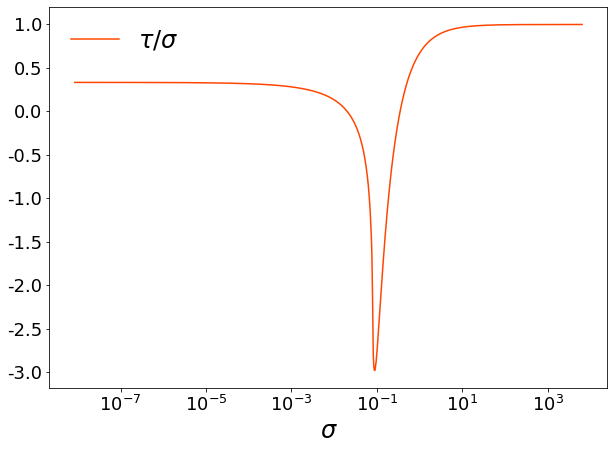

In [ ]:
x0 = np.zeros(len(q))
sigma = np.zeros(len(q))
hx = np.zeros(len(q))
tau = np.zeros(len(q))

for i in range(len(q)):
    x0[i] = static_lindhard_3d(q[i])/2.0
    sigma[i] = x0[i]*4.0*np.pi/q[i]**2
    hx[i] = static_hx_3d(q[i])/2.0
    tau[i] = sigma[i] + hx[i]/x0[i]


plt.figure(figsize=(10,7))

plt.plot(sigma,tau/sigma,color='orangered',label=r'$\tau/\sigma$')
plt.xscale('log')
plt.xlabel('$\sigma$',fontsize=24)

plt.legend(frameon=False,fontsize=24)
plt.show()